In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv("data/weatherAUS.csv")
df.shape

(145460, 23)

In [4]:
df = df.dropna(thresh=4)
df.shape

(145263, 23)

In [5]:
trash = ['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm', 'Rainfall']
df = df.drop(columns=trash)
df.shape

(145263, 18)

In [6]:
num_features = df.select_dtypes(include='number').columns.to_list()

In [7]:
corr_matrix = df[num_features].corr()

In [8]:
corr_matrix = corr_matrix.mask(corr_matrix < 0.5, 0)

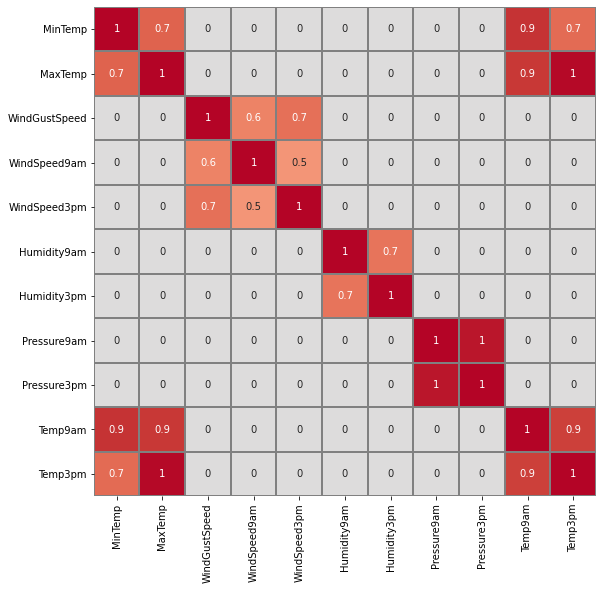

In [9]:
plt.figure(figsize=(9, 9))
sns.heatmap(corr_matrix, annot=True,
                vmin=-1, vmax=1, center=0, linewidths=1,
                cmap="coolwarm", fmt='.1g',
                linecolor='gray', cbar=False
           );

## WindSpeed features

In [10]:
wind_speed = df.filter(like="Speed").copy()
wind_speed.head()

,WindGustSpeed,WindSpeed9am,WindSpeed3pm
0,44.0,20.0,24.0
1,44.0,4.0,22.0
2,46.0,19.0,26.0
3,24.0,11.0,9.0
4,41.0,7.0,20.0


In [11]:
wind_speed_diff = (df['WindGustSpeed'] - df['WindSpeed3pm']).abs()

In [12]:
wind_speed.corrwith(wind_speed_diff)

WindGustSpeed    0.770864
WindSpeed9am     0.376302
WindSpeed3pm     0.065770
dtype: float64

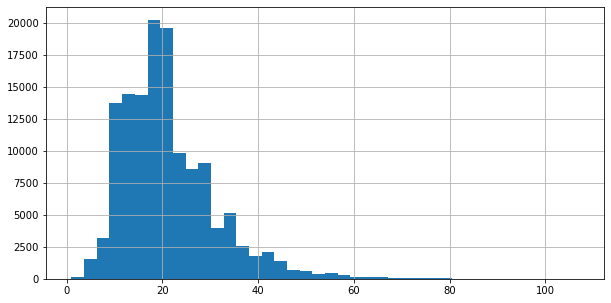

In [13]:
wind_speed_diff.hist(bins=40, figsize=(10, 5))
plt.show()

## Humidity features

In [14]:
humidity = df.filter(like="Humidity").copy()
humidity.head()

,Humidity9am,Humidity3pm
0,71.0,22.0
1,44.0,25.0
2,38.0,30.0
3,45.0,16.0
4,82.0,33.0


In [15]:
humidity_diff = (df['Humidity3pm'] - df['Humidity9am']).abs()

In [16]:
humidity.corrwith(humidity_diff)

Humidity9am    0.280348
Humidity3pm   -0.401646
dtype: float64

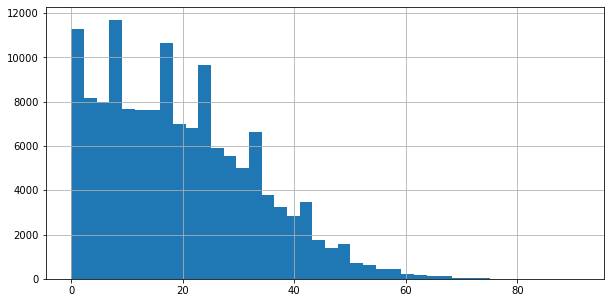

In [17]:
humidity_diff.hist(bins=40, figsize=(10, 5))
plt.show()

## Pressure features

In [18]:
pressure = df.filter(like="Pressure").copy()
pressure.head()

,Pressure9am,Pressure3pm
0,1007.7,1007.1
1,1010.6,1007.8
2,1007.6,1008.7
3,1017.6,1012.8
4,1010.8,1006.0


In [19]:
pressure_diff = (df['Pressure3pm'] - df['Pressure9am']).abs()

In [20]:
pressure.corrwith(pressure_diff)

Pressure9am    0.026234
Pressure3pm   -0.190010
dtype: float64

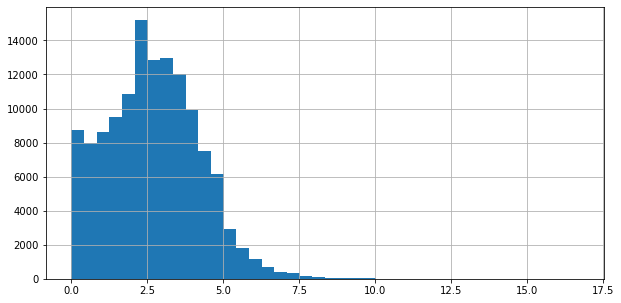

In [21]:
pressure_diff.hist(bins=40, figsize=(10, 5))
plt.show()

## Temp features

In [22]:
temperature = df.filter(like="Temp").copy()
temperature.head()

,MinTemp,MaxTemp,Temp9am,Temp3pm
0,13.4,22.9,16.9,21.8
1,7.4,25.1,17.2,24.3
2,12.9,25.7,21.0,23.2
3,9.2,28.0,18.1,26.5
4,17.5,32.3,17.8,29.7


In [23]:
temperature_diff = (df['MaxTemp'] - df['MinTemp']).abs()

In [24]:
temperature.corrwith(temperature_diff)

MinTemp   -0.233856
MaxTemp    0.485375
Temp9am    0.107052
Temp3pm    0.493075
dtype: float64

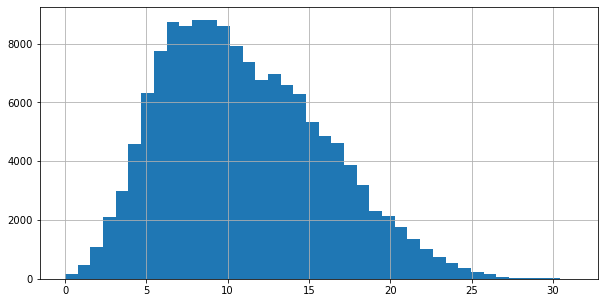

In [25]:
temperature_diff.hist(bins=40, figsize=(10, 5))
plt.show()

## WindDir features

In [26]:
wind_dir = df.filter(like="Dir").copy()
wind_dir.head()

,WindGustDir,WindDir9am,WindDir3pm
0,W,W,WNW
1,WNW,NNW,WSW
2,WSW,W,WSW
3,NE,SE,E
4,W,ENE,NW


In [27]:
wind_dir_change = (df['WindGustDir'] == df['WindDir3pm']).map({True: 1, False: 0})

In [28]:
wind_dir_change.value_counts()

0    103032
1     42231
dtype: int64

In [29]:
pd.crosstab(wind_dir_change, df['RainTomorrow'],
            normalize='index', rownames=['Change'])

RainTomorrow,No,Yes
Change,,
0,0.773388,0.226612
1,0.781780,0.218220


In [30]:
pd.crosstab(df['WindDir3pm'], df['RainTomorrow'],
            normalize='index', rownames=['WindDir3pm'])

RainTomorrow,No,Yes
WindDir3pm,,
E,0.828698,0.171302
ENE,0.821077,0.178923
ESE,0.830470,0.169530
N,0.720665,0.279335
NE,0.811244,0.188756
NNE,0.755276,0.244724
NNW,0.717315,0.282685
NW,0.717407,0.282593
S,0.783809,0.216191


In [31]:
pd.crosstab(df['WindDir9am'], df['RainTomorrow'],
            normalize='index', rownames=['WindDir9am'])

RainTomorrow,No,Yes
WindDir9am,,
E,0.854277,0.145723
ENE,0.823529,0.176471
ESE,0.852077,0.147923
N,0.691916,0.308084
NE,0.791683,0.208317
NNE,0.731127,0.268873
NNW,0.690051,0.309949
NW,0.720650,0.279350
S,0.802072,0.197928


In [32]:
df['WindDir9am'].str.slice(stop=1).value_counts()

N    44287
S    43068
E    24642
W    22897
Name: WindDir9am, dtype: int64

In [33]:
wind_dir_change2 = (df['WindGustDir'].str.slice(stop=1) == \
                    df['WindDir3pm'].str.slice(stop=1)
                    ).map({True: 1, False: 0})

In [34]:
wind_dir_change2.value_counts()

1    89350
0    55913
dtype: int64

In [35]:
pd.crosstab(wind_dir_change2, df['RainTomorrow'],
            normalize='index', rownames=['Change'])

RainTomorrow,No,Yes
Change,,
0,0.767894,0.232106
1,0.780759,0.219241


## Date feature

In [36]:
date_month = pd.to_datetime(df['Date']).dt.month_name()
date_month.value_counts()

May          13338
March        13336
January      13228
June         12658
October      12015
August       12014
July         12011
November     11660
September    11622
April        11527
December     11070
February     10784
Name: Date, dtype: int64

In [37]:
pd.crosstab(date_month, df['RainTomorrow'],
                normalize='index', rownames=['Month']
            ).sort_values(by='Yes', ascending=False)

RainTomorrow,No,Yes
Month,,
July,0.730792,0.269208
June,0.738155,0.261845
August,0.747492,0.252508
September,0.770295,0.229705
May,0.774722,0.225278
April,0.782220,0.217780
March,0.786788,0.213212
November,0.787453,0.212547
February,0.790289,0.209711


In [38]:
date_week = pd.to_datetime(df['Date']).dt.isocalendar().week
date_week.value_counts()

18    3017
22    3013
23    3013
10    3013
19    3012
20    3012
24    3009
12    3008
25    3008
21    3007
11    3006
2     2989
3     2989
4     2988
13    2875
1     2865
5     2853
9     2820
17    2738
45    2723
47    2721
44    2718
35    2716
46    2716
40    2716
33    2715
42    2714
32    2714
29    2714
39    2713
34    2713
41    2713
36    2712
28    2712
30    2712
37    2712
43    2710
38    2709
31    2708
27    2707
15    2694
16    2689
14    2683
7     2673
6     2673
8     2668
26    2667
48    2627
51    2505
52    2501
50    2500
49    2495
53     665
Name: week, dtype: Int64

In [39]:
pd.crosstab(date_week, df['RainTomorrow'],
                normalize='index', rownames=['Week']
            ).sort_values(by='Yes', ascending=False)

RainTomorrow,No,Yes
Week,,
28,0.702376,0.297624
21,0.711210,0.288790
29,0.712894,0.287106
30,0.723019,0.276981
39,0.723123,0.276877
33,0.723995,0.276005
22,0.726074,0.273926
25,0.729160,0.270840
24,0.738006,0.261994
